In [24]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

tcgajax_prj = "/projects/li-lab/nmf_epihet/tcgajax"
sys.path.append(tcgajax_prj)

from nanocompare.scatter_plots_generation import load_refined_data,get_one_dsname,get_three_dsname
from lilab.tcga.global_tcga import *
from lilab.tcga.utils import current_time_str


In [25]:
df = load_refined_data()
df

,Dataset,Location,Tool,Measurement,Performance
0,K562_WGBS_joined,GW,Nanopolish_calls,F1_5C,0.973656
1,K562_WGBS_joined,singletons,Nanopolish_calls,F1_5C,0.972089
2,K562_WGBS_joined,nonsingletons,Nanopolish_calls,F1_5C,0.978164
3,K562_WGBS_joined,cpgIslandExt,Nanopolish_calls,F1_5C,0.981434
4,K562_WGBS_joined,exonFeature,Nanopolish_calls,F1_5C,0.982214
...,...,...,...,...,...
517,HL60_AML_oxBsseq_cut5,exonFeature,DeepMod_calls,F1_5mC,0.573355
518,HL60_AML_oxBsseq_cut5,intergenic,DeepMod_calls,F1_5mC,0.739625
519,HL60_AML_oxBsseq_cut5,promoters_500bp,DeepMod_calls,F1_5mC,0.426156
520,HL60_AML_oxBsseq_cut5,discordant,DeepMod_calls,F1_5mC,0.642202


In [26]:
df_sel = get_one_dsname("HL60_AML_Bsseq_cut5")
df_sel

/projects/li-lab/nmf_epihet/tcgajax/nanocompare/scatter_plots_generation.py:252: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df['Location'].isin(listOfSelected_cat)]


,Dataset,Location,Tool,Measurement,Performance
450,HL60_AML_Bsseq_cut5,GW,DeepSignal_calls,F1_5mC,0.916586
453,HL60_AML_Bsseq_cut5,cpgIslandExt,DeepSignal_calls,F1_5mC,0.727525
454,HL60_AML_Bsseq_cut5,exonFeature,DeepSignal_calls,F1_5mC,0.870394
455,HL60_AML_Bsseq_cut5,intergenic,DeepSignal_calls,F1_5mC,0.910953
456,HL60_AML_Bsseq_cut5,promoters_500bp,DeepSignal_calls,F1_5mC,0.797054
459,HL60_AML_Bsseq_cut5,GW,Tombo_calls,F1_5mC,0.765125
462,HL60_AML_Bsseq_cut5,cpgIslandExt,Tombo_calls,F1_5mC,0.598352
463,HL60_AML_Bsseq_cut5,exonFeature,Tombo_calls,F1_5mC,0.717542
464,HL60_AML_Bsseq_cut5,intergenic,Tombo_calls,F1_5mC,0.761555
465,HL60_AML_Bsseq_cut5,promoters_500bp,Tombo_calls,F1_5mC,0.650625


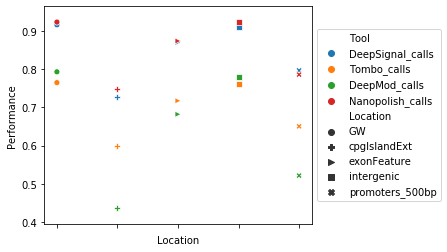

In [27]:
style = 'Location'
filled_markers = ('o', 'P', '>', 's', 'X')
ax = sns.scatterplot(x="Location", y="Performance", hue='Tool', data=df_sel, style=style, markers=filled_markers)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

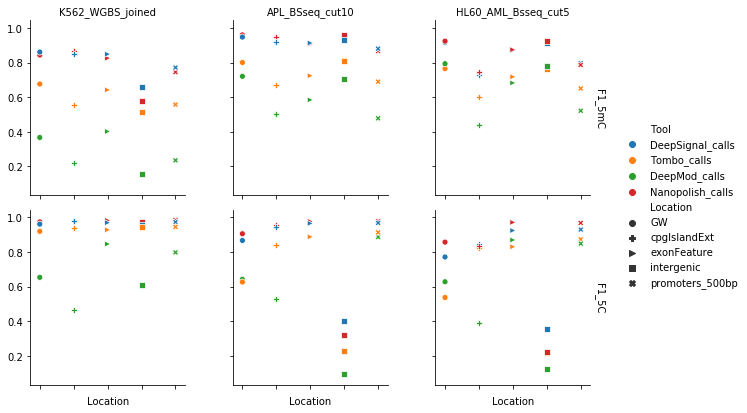

In [34]:
dfsel3=get_three_dsname()
grid = sns.FacetGrid(dfsel3, row='Measurement', col='Dataset', row_order=['F1_5mC', 'F1_5C'], margin_titles=True)

grid.map(sns.scatterplot, "Location", "Performance", 'Tool',"Location", markers=filled_markers, hue_order=['DeepSignal_calls', 'Tombo_calls',  'DeepMod_calls','Nanopolish_calls'])
# grid.map(sns.catplot, "Location", "Performance", 'Tool',"Location", markers=filled_markers, hue_order=['DeepSignal_calls', 'Tombo_calls',  'DeepMod_calls','Nanopolish_calls'])

# grid.set_titles(row_template = '{row_name}', col_template = '{col_name}')
[plt.setp(ax.texts, text="") for ax in grid.axes.flat]
grid.set_titles(row_template = '{row_name}', col_template = '{col_name}')
grid.set_xticklabels(rotation=45)

grid.add_legend()

# Iterate thorugh each axis
for ax in grid.axes.flat:
    ax.set_ylabel("")
#     ax.set_title(ax.get_title(), fontsize='xx-large')
#     # This only works for the left ylabels
#     ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large'
outfn=os.path.join(pic_base_dir, f"nanocompare_ds_location_f1_5c_5mc_performance_time_{current_time_str()}.png")
grid.savefig(outfn, format='png', dpi=600)